Cài đặt thư viện

In [ ]:
%pip install facebook_scraper pandas numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
post_df_full = pd.read_csv('Data/ConganThuDo.csv')

In [3]:
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        700 non-null    int64  
 1   text                           700 non-null    object 
 2   post_text                      700 non-null    object 
 3   shared_text                    4 non-null      object 
 4   original_text                  40 non-null     object 
 5   time                           700 non-null    object 
 6   timestamp                      700 non-null    int64  
 7   image                          532 non-null    object 
 8   image_lowquality               700 non-null    object 
 9   images                         699 non-null    object 
 10  images_description             699 non-null    object 
 11  images_lowquality              700 non-null    object 
 12  images_lowquality_description  700 non-null    obj

Xóa các cột có giá trị NaN

In [4]:
post_df_full = post_df_full.dropna(axis=1,how='all')
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        700 non-null    int64  
 1   text                           700 non-null    object 
 2   post_text                      700 non-null    object 
 3   shared_text                    4 non-null      object 
 4   original_text                  40 non-null     object 
 5   time                           700 non-null    object 
 6   timestamp                      700 non-null    int64  
 7   image                          532 non-null    object 
 8   image_lowquality               700 non-null    object 
 9   images                         699 non-null    object 
 10  images_description             699 non-null    object 
 11  images_lowquality              700 non-null    object 
 12  images_lowquality_description  700 non-null    obj

In [11]:
post_df_full

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,page_id,image_id,image_ids,video_ids,videos,was_live,fetched_time,month,day,year
0,743113737859489,CÔNG AN THỊ XÃ SƠN TÂY TRIỆT PHÁ Ổ NHÓM TRỘM C...,CÔNG AN THỊ XÃ SƠN TÂY TRIỆT PHÁ Ổ NHÓM TRỘM C...,NaN,NaN,2023-11-13 22:02:38,1699887758,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,1170238399853065,NaN,[],[],[],False,2023-11-14 00:18:01.369441,11,13,2023
1,742948967875966,CÔNG AN QUẬN TÂY HỒ TRIỆT PHÁ Ổ NHÓM ĐỐI TƯỢNG...,CÔNG AN QUẬN TÂY HỒ TRIỆT PHÁ Ổ NHÓM ĐỐI TƯỢNG...,NaN,NaN,2023-11-13 16:00:29,1699866029,NaN,https://scontent.fhan2-3.fna.fbcdn.net/v/t15.5...,[],...,1170238399853065,NaN,[],NaN,NaN,False,2023-11-14 00:18:10.246954,11,13,2023
2,742904851213711,"TUYÊN TRUYỀN, TẬP HUẤN KIẾN THỨC KỸ NĂNG PCCC ...","TUYÊN TRUYỀN, TẬP HUẤN KIẾN THỨC KỸ NĂNG PCCC ...",NaN,NaN,2023-11-13 14:04:03,1699859043,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,1170238399853065,NaN,[],[],[],False,2023-11-14 00:18:15.841710,11,13,2023
3,742847824552747,LẶNG THẦM NHỮNG BƯỚC CHÂN CỦA NGƯỜI LÍNH PCCC ...,LẶNG THẦM NHỮNG BƯỚC CHÂN CỦA NGƯỜI LÍNH PCCC ...,NaN,NaN,2023-11-13 11:27:28,1699849648,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,1170238399853065,NaN,[],[],[],False,2023-11-14 00:18:22.701820,11,13,2023
4,742828251221371,XỬ PHẠT LÁI XE TẢI ĐI VÀO ĐƯỜNG CẤM QUA TIN BÁ...,XỬ PHẠT LÁI XE TẢI ĐI VÀO ĐƯỜNG CẤM QUA TIN BÁ...,NaN,NaN,2023-11-13 10:36:32,1699846592,NaN,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,[],...,1170238399853065,7.428282e+14,['742828227888040'],NaN,NaN,False,2023-11-14 00:18:24.916329,11,13,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2123910161152546,BẮT GIỮ ĐỐI TƯỢNG TỔ CHỨC SỬ DỤNG TRÁI PHÉP CH...,BẮT GIỮ ĐỐI TƯỢNG TỔ CHỨC SỬ DỤNG TRÁI PHÉP CH...,NaN,NaN,2022-08-24 17:15:05,1661336105,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,1170238399853065,2.123910e+15,['2123910134485882'],NaN,NaN,False,2023-11-14 01:58:18.381121,8,24,2022
696,2123726801170882,CÔNG AN QUẬN HÀ ĐÔNG LIÊN TIẾP BẮT GIỮ CÁC ĐỐI...,CÔNG AN QUẬN HÀ ĐÔNG LIÊN TIẾP BẮT GIỮ CÁC ĐỐI...,NaN,NaN,2022-08-24 10:30:39,1661311839,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,1170238399853065,NaN,[],NaN,NaN,False,2023-11-14 01:59:00.796512,8,24,2022
697,2123689141174648,Bản tin 141 ngày 23/08/2022,Bản tin 141 ngày 23/08/2022,NaN,NaN,2022-08-24 09:17:30,1661307450,NaN,https://scontent.fhan2-3.fna.fbcdn.net/v/t15.5...,[],...,1170238399853065,NaN,[],NaN,NaN,False,2023-11-14 01:59:21.433974,8,24,2022
698,2123239704552925,HÀ ĐÔNG: NGƯỜI PHỤ NỮ BỊ MẤT 2 TỶ ĐỒNG KHI NGH...,HÀ ĐÔNG: NGƯỜI PHỤ NỮ BỊ MẤT 2 TỶ ĐỒNG KHI NGH...,NaN,NaN,2022-08-23 22:11:49,1661267509,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,1170238399853065,2.123240e+15,['2123239654552930'],NaN,NaN,False,2023-11-14 01:59:25.309443,8,23,2022


In [6]:
post_df_full['text']=post_df_full['text'].fillna('none')
post_df_full['post_text']=post_df_full['post_text'].fillna('none')


In [7]:
post_df_full['time'] = pd.to_datetime(post_df_full['time'])
post_df_full['month'] = post_df_full['time'].dt.month
post_df_full['day']= post_df_full['time'].dt.day
post_df_full['year']=post_df_full['time'].dt.year
post_df_full[['day','month','year']]

,day,month,year
0,13,11,2023
1,13,11,2023
2,13,11,2023
3,13,11,2023
4,13,11,2023
...,...,...,...
695,24,8,2022
696,24,8,2022
697,24,8,2022
698,23,8,2022


In [8]:
post_df_full.describe()

,post_id,time,timestamp,video_id,likes,comments,shares,user_id,reaction_count,page_id,image_id,month,day,year
count,7.000000e+02,700,7.000000e+02,1.660000e+02,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,3.000000e+02,700.000000,700.000000,700.000000
mean,1.022668e+15,2023-07-12 11:39:03.274285568,1.689137e+09,1.430214e+15,588.987143,105.277143,25.935714,3.293877e+14,652.915714,1.170238e+15,1.076541e+15,9.408571,15.848571,2022.785714
min,6.930073e+14,2022-08-23 19:54:00,1.661259e+09,1.424409e+14,40.000000,0.000000,0.000000,1.000648e+14,41.000000,1.170238e+15,6.930072e+14,8.000000,1.000000,2022.000000
25%,7.108835e+14,2023-08-26 15:03:09.500000,1.693037e+09,4.992576e+14,115.000000,2.000000,9.000000,1.000648e+14,125.000000,1.170238e+15,7.093781e+14,9.000000,7.000000,2023.000000
50%,7.263544e+14,2023-09-23 18:40:10.500000,1.695469e+09,8.551540e+14,241.000000,9.000000,14.000000,1.000648e+14,262.000000,1.170238e+15,7.257518e+14,9.000000,16.000000,2023.000000
75%,7.410131e+14,2023-10-19 22:33:27,1.697730e+09,1.394684e+15,637.500000,53.000000,28.000000,1.000648e+14,677.250000,1.170238e+15,2.123407e+15,10.000000,24.000000,2023.000000
max,2.146221e+15,2023-11-13 22:02:38,1.699888e+09,8.024529e+15,9611.000000,6500.000000,982.000000,1.170238e+15,13094.000000,1.170238e+15,2.145846e+15,11.000000,31.000000,2023.000000
std,5.811441e+14,NaN,1.404188e+07,1.691847e+15,973.213307,394.079671,52.131589,4.394339e+14,1149.253170,2.501788e-01,6.177525e+14,0.889574,9.282712,0.410619


In [12]:
post_df_full['reaction_count'].sum()

457041

In [13]:
post_df_full['reaction_count'].mean()

652.9157142857143

In [14]:
post_df_full[['post_id','reactions']]

,post_id,reactions
0,743113737859489,"{'like': 229, 'love': 2, 'haha': 89, 'wow': 3,..."
1,742948967875966,"{'like': 62, 'love': 2, 'haha': 1, 'sad': 1}"
2,742904851213711,"{'like': 94, 'love': 4}"
3,742847824552747,"{'like': 90, 'love': 2, 'haha': 1, 'care': 1}"
4,742828251221371,"{'like': 111, 'love': 2, 'haha': 18}"
...,...,...
695,2123910161152546,"{'like': 9530, 'love': 42, 'haha': 1483, 'wow'..."
696,2123726801170882,"{'like': 1622, 'love': 9, 'haha': 37, 'wow': 6..."
697,2123689141174648,"{'like': 1153, 'love': 20, 'haha': 5, 'wow': 2..."
698,2123239704552925,"{'like': 1147, 'love': 6, 'haha': 104, 'wow': ..."


In [15]:
post_df_full[['time','reaction_count']]

,time,reaction_count
0,2023-11-13 22:02:38,329
1,2023-11-13 16:00:29,66
2,2023-11-13 14:04:03,98
3,2023-11-13 11:27:28,94
4,2023-11-13 10:36:32,131
...,...,...
695,2022-08-24 17:15:05,11204
696,2022-08-24 10:30:39,1678
697,2022-08-24 09:17:30,1188
698,2022-08-23 22:11:49,1294


In [21]:
ax= post_df_full['timestamp'].to_list()
ay= post_df_full['reaction_count'].to_list()
ax.reverse()
ay.reverse()
print(len(ax),len(ay))
print(ax)
print(ay)

700 700
[1661259240, 1661267509, 1661307450, 1661311839, 1661336105, 1661338800, 1661352712, 1661390776, 1661398096, 1661419001, 1661426894, 1661433187, 1661434968, 1661439504, 1661476828, 1661482382, 1661499992, 1661505181, 1661571190, 1661594688, 1661600210, 1661607090, 1661613005, 1661650828, 1661671604, 1661678776, 1661696381, 1661698803, 1661740706, 1661743181, 1661759322, 1661766513, 1661781653, 1661784300, 1661791836, 1661817601, 1661828293, 1661833942, 1661853178, 1661871217, 1661934569, 1661936325, 1661951701, 1661958163, 1662001244, 1662002188, 1662025541, 1662039520, 1662045782, 1662079271, 1662084132, 1662092278, 1662107865, 1662110958, 1662127531, 1662130927, 1662165381, 1662173745, 1662195522, 1662214722, 1662217109, 1662253860, 1662261531, 1662283560, 1662303863, 1662340264, 1662349349, 1662364638, 1662381140, 1662392054, 1662428832, 1662435614, 1662455896, 1662472088, 1662476078, 1662515952, 1662520835, 1662542873, 1662557846, 1662562825, 1662568858, 1662595441, 1662609

BIỂU ĐỒ THỂ HIỆN HIỆU SUẤT REACTION CỦA CÁC BÀI ĐĂNG

<function matplotlib.pyplot.show(close=None, block=None)>

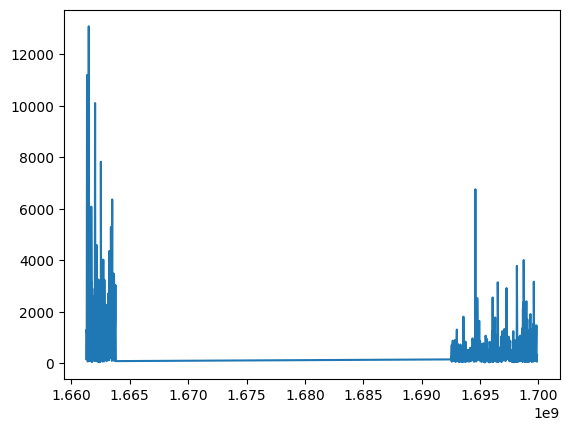

In [22]:
plt.plot(ax,ay)
plt.show

In [23]:
post_df_full['reactions'].tolist()

["{'like': 229, 'love': 2, 'haha': 89, 'wow': 3, 'care': 1, 'sad': 4, 'angry': 1}",
 "{'like': 62, 'love': 2, 'haha': 1, 'sad': 1}",
 "{'like': 94, 'love': 4}",
 "{'like': 90, 'love': 2, 'haha': 1, 'care': 1}",
 "{'like': 111, 'love': 2, 'haha': 18}",
 "{'like': 1448, 'love': 19, 'haha': 5, 'care': 1, 'sad': 2}",
 "{'like': 298, 'love': 4, 'care': 4, 'sad': 6}",
 "{'like': 389, 'love': 3, 'haha': 3, 'wow': 1, 'care': 1}",
 "{'like': 111, 'love': 9}",
 "{'like': 154, 'love': 7, 'angry': 2}",
 "{'like': 108, 'love': 10}",
 "{'like': 811, 'love': 12, 'wow': 1, 'care': 2, 'sad': 1, 'angry': 2}",
 "{'like': 642, 'love': 8, 'haha': 18, 'wow': 4, 'sad': 3, 'angry': 1}",
 "{'like': 99, 'love': 4}",
 "{'like': 764, 'love': 13, 'haha': 59, 'wow': 3, 'care': 1, 'sad': 3}",
 "{'like': 277, 'love': 4, 'haha': 4}",
 "{'like': 1255, 'love': 23, 'haha': 2, 'wow': 2, 'care': 1, 'sad': 4, 'angry': 3}",
 "{'like': 1522, 'love': 10, 'haha': 23, 'wow': 17, 'care': 2, 'sad': 6}",
 "{'like': 248, 'love': 5, 

In [24]:
first_row= post_df_full.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions

{'like': 229,
 'love': 2,
 'haha': 89,
 'wow': 3,
 'care': 1,
 'sad': 4,
 'angry': 1,
 'shares': 33,
 'comments': 139}

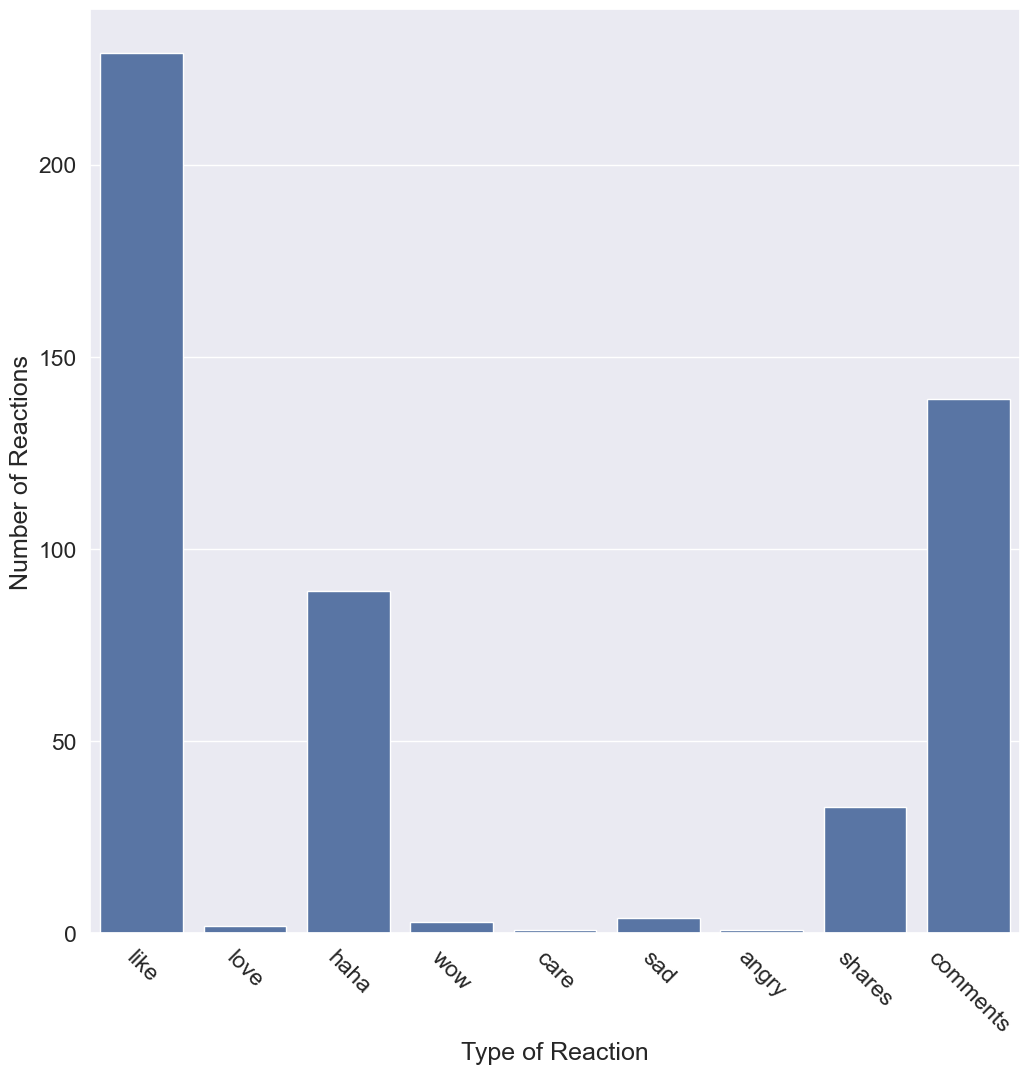

In [25]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,12)})
sns.set(font_scale=1.5)

fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

In [26]:
a= post_df_full['reactions'].apply(lambda x: dict(eval(x)))
b=a.apply(pd.Series)
post_df_full=pd.concat([post_df_full,b],axis=1)


In [27]:
post_df_full[['post_id','like','love','haha','care','sad','wow','angry']]

,post_id,like,love,haha,care,sad,wow,angry
0,743113737859489,229.0,2.0,89.0,1.0,4.0,3.0,1.0
1,742948967875966,62.0,2.0,1.0,NaN,1.0,NaN,NaN
2,742904851213711,94.0,4.0,NaN,NaN,NaN,NaN,NaN
3,742847824552747,90.0,2.0,1.0,1.0,NaN,NaN,NaN
4,742828251221371,111.0,2.0,18.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
695,2123910161152546,9530.0,42.0,1483.0,9.0,84.0,55.0,1.0
696,2123726801170882,1622.0,9.0,37.0,1.0,3.0,6.0,NaN
697,2123689141174648,1153.0,20.0,5.0,2.0,3.0,2.0,3.0
698,2123239704552925,1147.0,6.0,104.0,NaN,17.0,20.0,NaN


In [28]:
post_df_full[['like','love','haha','care','sad','wow','angry']]=post_df_full[['like','love','haha','care','sad','wow','angry']].fillna(0)

In [29]:
post_df_full[['post_id','like','love','haha','care','sad','wow','angry']]

,post_id,like,love,haha,care,sad,wow,angry
0,743113737859489,229.0,2.0,89.0,1.0,4.0,3.0,1.0
1,742948967875966,62.0,2.0,1.0,0.0,1.0,0.0,0.0
2,742904851213711,94.0,4.0,0.0,0.0,0.0,0.0,0.0
3,742847824552747,90.0,2.0,1.0,1.0,0.0,0.0,0.0
4,742828251221371,111.0,2.0,18.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
695,2123910161152546,9530.0,42.0,1483.0,9.0,84.0,55.0,1.0
696,2123726801170882,1622.0,9.0,37.0,1.0,3.0,6.0,0.0
697,2123689141174648,1153.0,20.0,5.0,2.0,3.0,2.0,3.0
698,2123239704552925,1147.0,6.0,104.0,0.0,17.0,20.0,0.0


In [30]:
a=post_df_full[['like','love','haha','care','sad','wow','angry']].sum()
a=a.to_dict()

Text(0.5, 0, 'Type of Reaction')

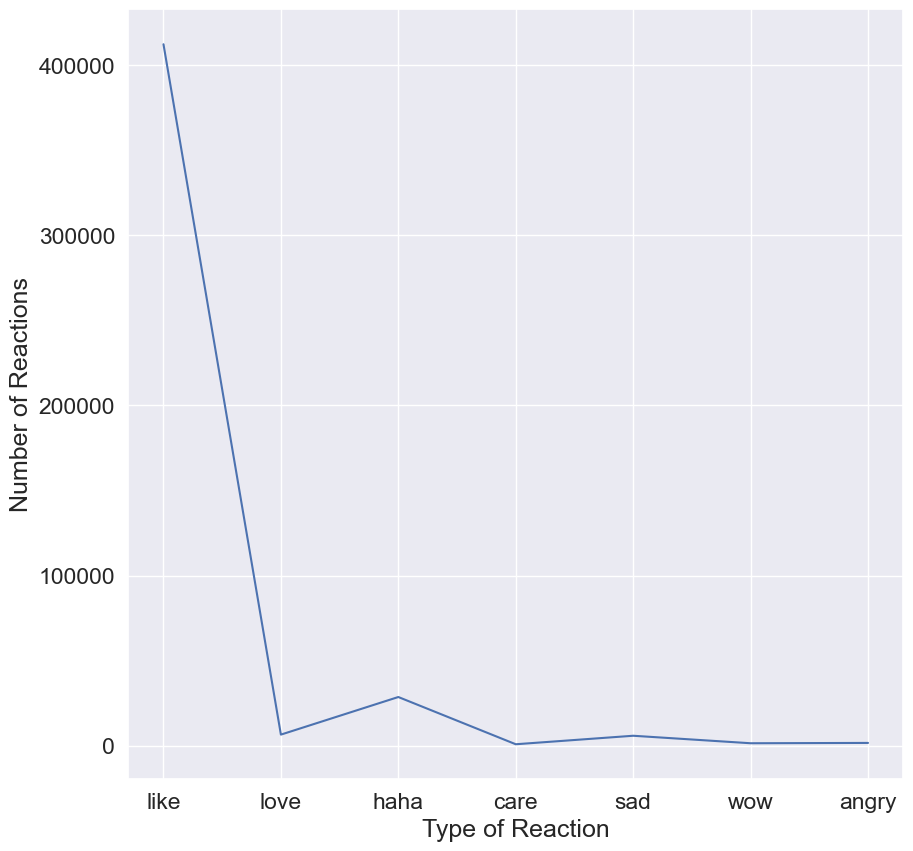

In [31]:

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(x=list(a.keys()), y=list(a.values()))
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")

In [32]:
a=[]
for i in range(1,13):
    b=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2023),'reaction_count'].sum()
    a.append(b)
print(a)

[0, 0, 0, 0, 0, 0, 0, 18637, 69392, 90581, 41825, 0]


In [33]:
dict={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    dict[key[i]]=a[i]
print(dict)

{'T1': 0, 'T2': 0, 'T3': 0, 'T4': 0, 'T5': 0, 'T6': 0, 'T7': 0, 'T8': 18637, 'T9': 69392, 'T10': 90581, 'T11': 41825, 'T12': 0}


Text(0.5, 0, '2023')

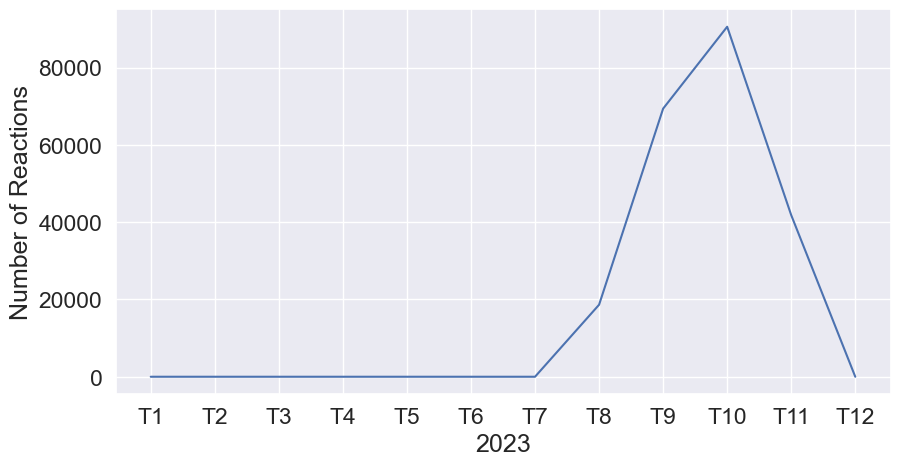

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=list(dict.keys()), y=list(dict.values()))
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("2023")

In [35]:
x=[]
for i in range(1,13):
    b=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2022),'reaction_count'].sum()
    x.append(b)
print(x)

[0, 0, 0, 0, 0, 0, 0, 70033, 166573, 0, 0, 0]


In [36]:
dict1={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    dict1[key[i]]=x[i]
print(dict1)

{'T1': 0, 'T2': 0, 'T3': 0, 'T4': 0, 'T5': 0, 'T6': 0, 'T7': 0, 'T8': 70033, 'T9': 166573, 'T10': 0, 'T11': 0, 'T12': 0}


Text(0.5, 0, '2023')

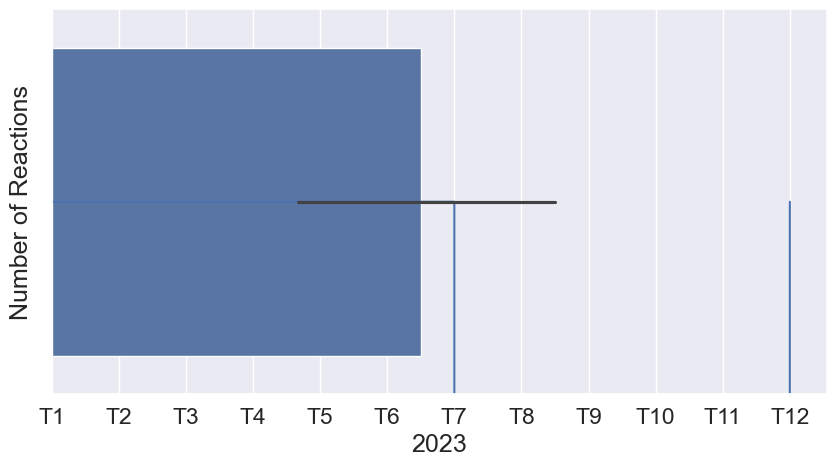

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=list(dict.keys()), y=list(dict.values()))
ax= sns.barplot(x=list(dict1.keys()))
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("2023")

In [41]:
post_df_full['comments'].sum()

73694

In [42]:
a=post_df_full['comments_full'].value_counts()
a

comments_full
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [43]:
df_text = post_df_full[['post_id','post_text']]
text    = str(df_text['post_text'])
df_text

,post_id,post_text
0,743113737859489,CÔNG AN THỊ XÃ SƠN TÂY TRIỆT PHÁ Ổ NHÓM TRỘM C...
1,742948967875966,CÔNG AN QUẬN TÂY HỒ TRIỆT PHÁ Ổ NHÓM ĐỐI TƯỢNG...
2,742904851213711,"TUYÊN TRUYỀN, TẬP HUẤN KIẾN THỨC KỸ NĂNG PCCC ..."
3,742847824552747,LẶNG THẦM NHỮNG BƯỚC CHÂN CỦA NGƯỜI LÍNH PCCC ...
4,742828251221371,XỬ PHẠT LÁI XE TẢI ĐI VÀO ĐƯỜNG CẤM QUA TIN BÁ...
...,...,...
695,2123910161152546,BẮT GIỮ ĐỐI TƯỢNG TỔ CHỨC SỬ DỤNG TRÁI PHÉP CH...
696,2123726801170882,CÔNG AN QUẬN HÀ ĐÔNG LIÊN TIẾP BẮT GIỮ CÁC ĐỐI...
697,2123689141174648,Bản tin 141 ngày 23/08/2022
698,2123239704552925,HÀ ĐÔNG: NGƯỜI PHỤ NỮ BỊ MẤT 2 TỶ ĐỒNG KHI NGH...


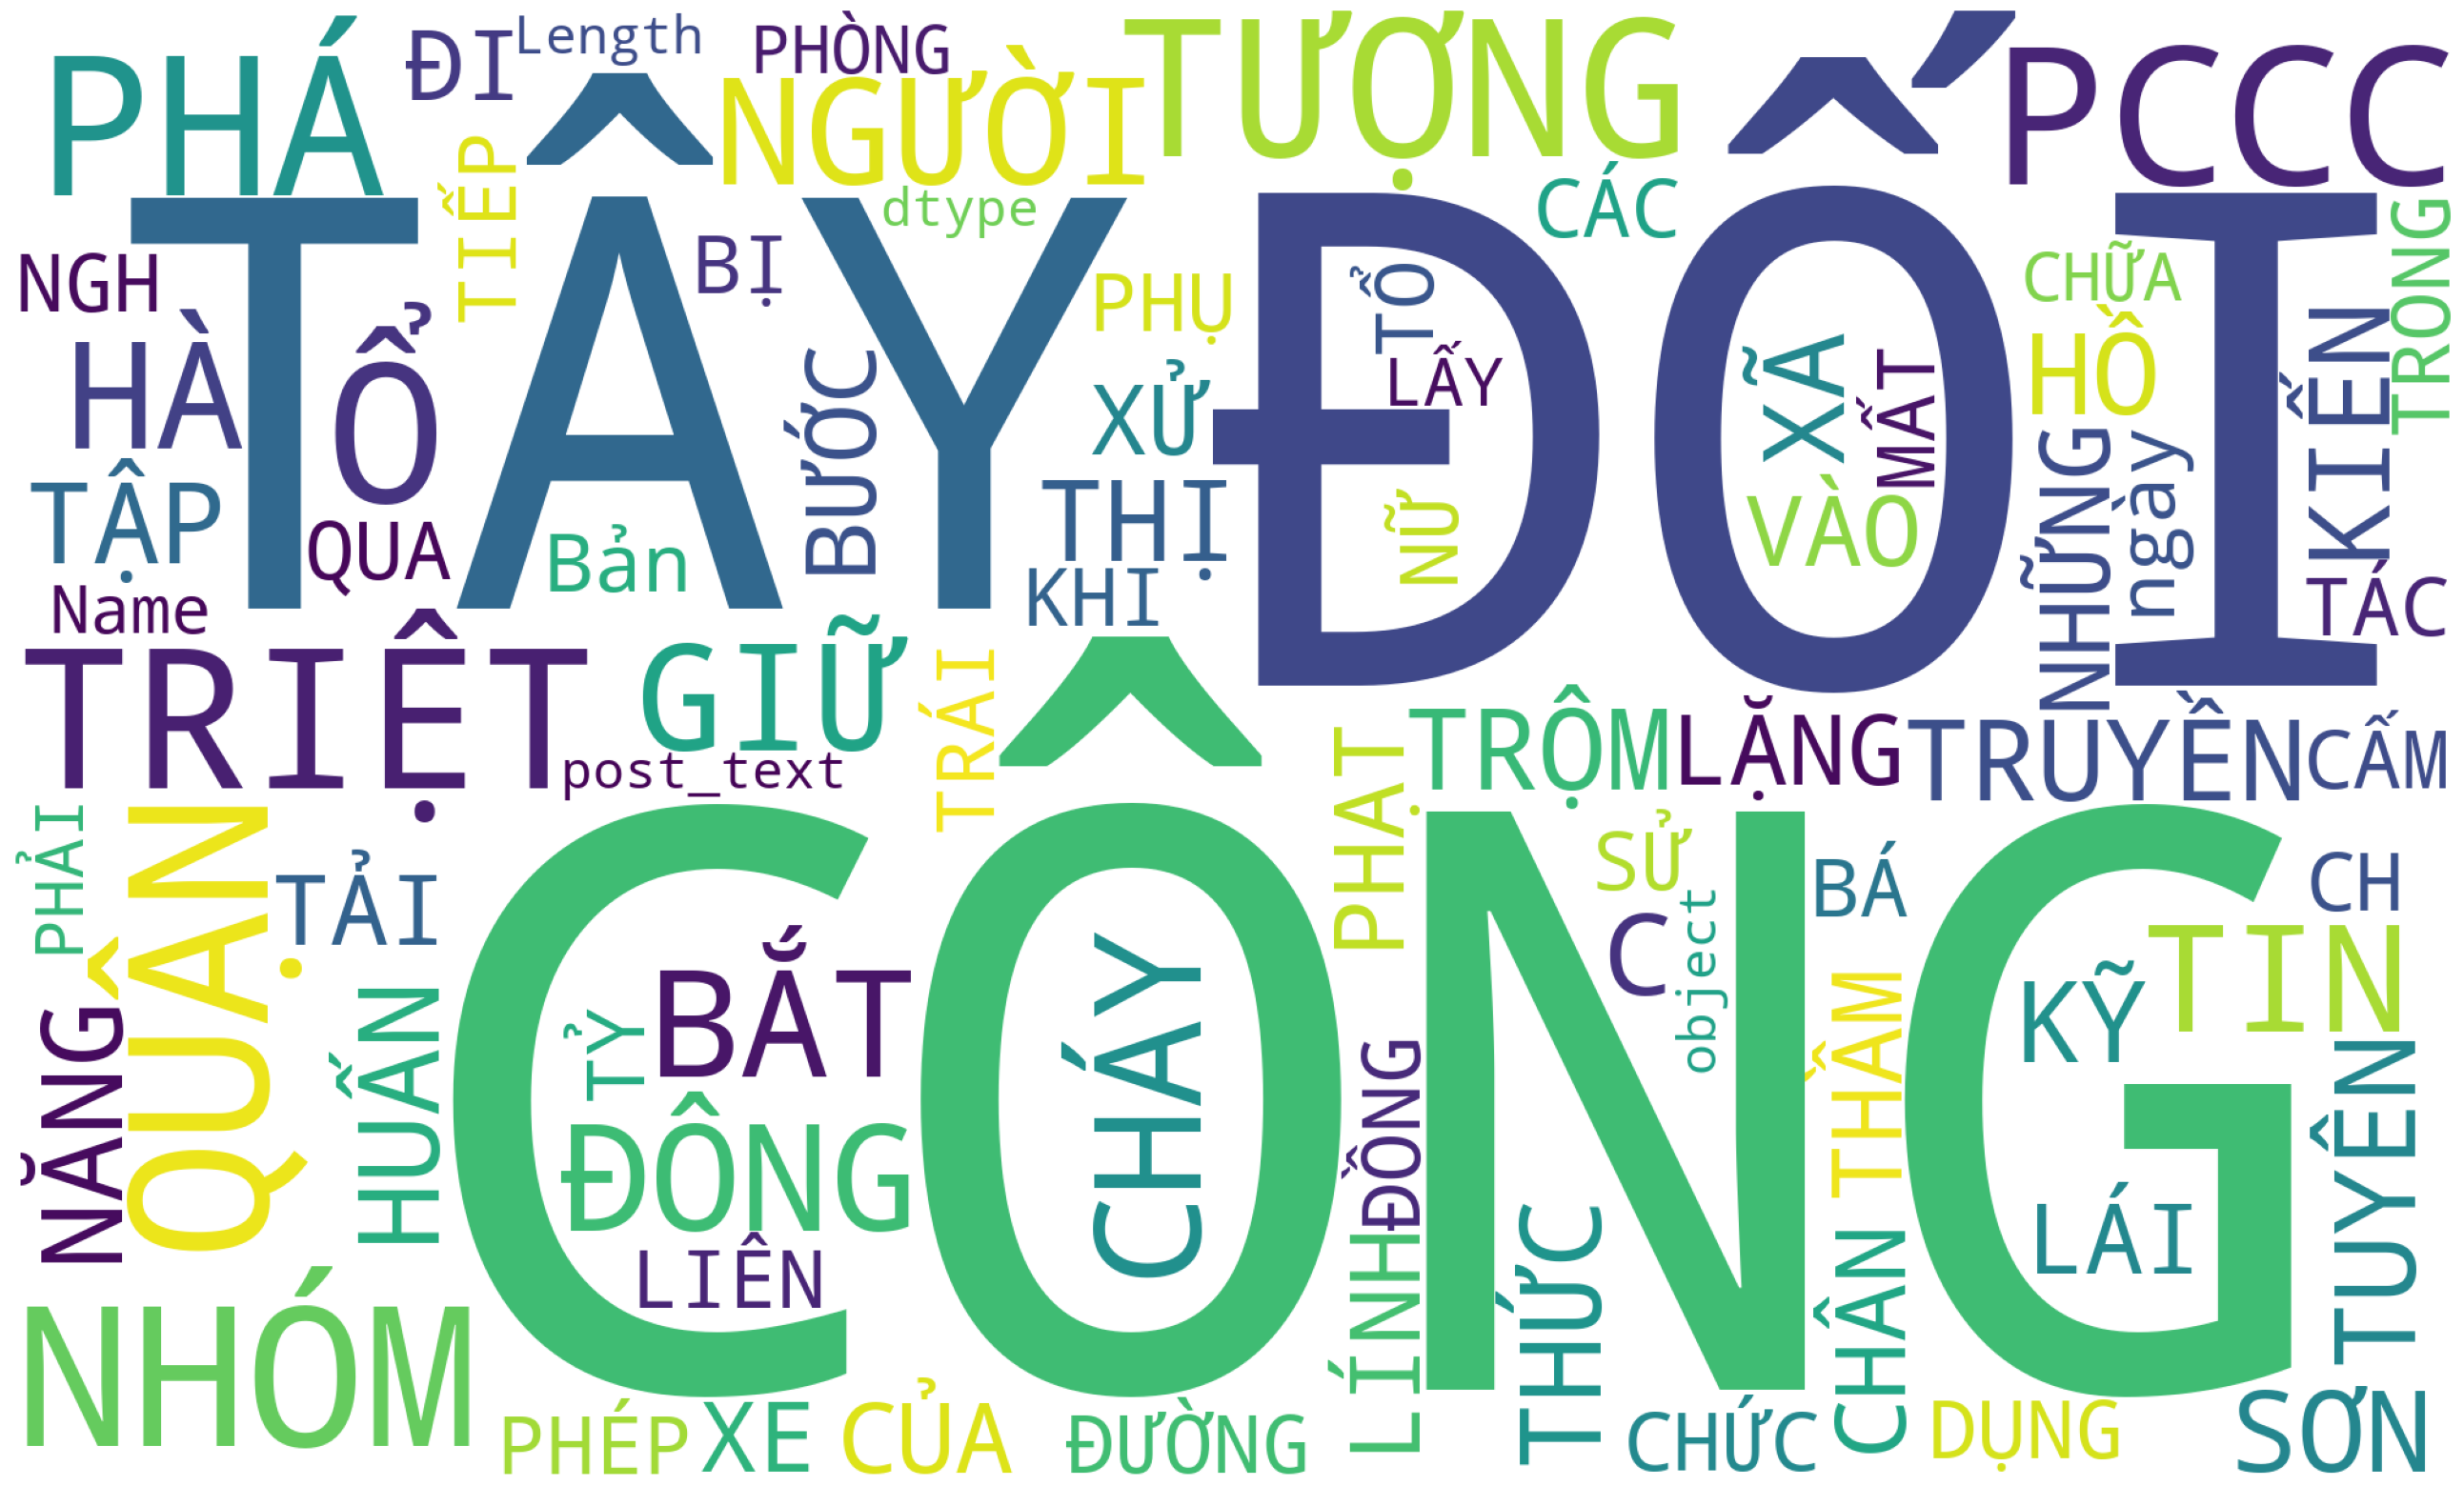

In [45]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=300,width=2000, height=1200).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [46]:
x= post_df_full['text'].tolist()
x

['CÔNG AN THỊ XÃ SƠN TÂY TRIỆT PHÁ Ổ NHÓM TRỘM CẮP XE MÁY\n\nCông an thị xã Sơn Tây vừa triệt phá ổ nhóm trộm cắp xe máy và bắt giữ 04 đối tượng gồm: Đoàn Anh Dũng (SN 1997), Nguyễn Hữu Thật (SN 1998), Nguyễn Hữu Thanh (SN 1999), Nguyễn Hữu Đại (SN 1997), cùng trú tại xã Võng Xuyên, huyện Phúc Thọ, TP Hà Nội để điều tra hành vi trộm cắp tài sản.\n\nTrước đó, Công an thị xã Sơn Tây tiếp nhận tin báo của ông T (SN 1963; trú tại: Viên Sơn, Sơn Tây) về việc chiều ngày 27/10/2023, ông T bị mất 01 chiếc xe máy Honda Dream trên phố Lê Lợi, phường Lê Lợi, thị xã Sơn Tây. Ngay sau khi nhận được thông tin, Công an thị xã Sơn Tây đã khẩn trương điều tra, làm rõ vụ việc. Qua xác minh, Công an thị xã Sơn Tây đã bắt giữ 04 đối tượng gồm Đoàn Anh Dũng (SN 1997), Nguyễn Hữu Thật (SN 1998), Nguyễn Hữu Thanh (SN 1999), Nguyễn Hữu Đại (SN 1997), cùng trú tại xã Võng Xuyên, huyện Phúc Thọ, TP Hà Nội. Tang vật thu giữ là 01 chiếc xe máy, 03 tay công, 02 vam phá khóa, 01 máy siết bu lông cùng các đồ vật tài

In [53]:
key= "Hoài Đức"
count=0
for i in x:
    count+= i.count(key)
print("Có "+str(count) + " bài viết chứa từ khóa "+key+" trong tổng số "+str(len(x))+" bài viết")

Có 23 bài viết chứa từ khóa Hoài Đức trong tổng số 700 bài viết


In [55]:
from collections import Counter

for i in x:
    words = i.split()  
    word_counts = Counter(words)  
    most_common_word = word_counts.most_common(1)
    most= most_common_word[0]
print("Từ khóa xuất hiện nhiều nhất trong "+str(len(x))+" bài viết là: "+most[0])

Từ khóa xuất hiện nhiều nhất trong 700 bài viết là: các


Biểu đồ biểu diễn lượt share theo thời gian

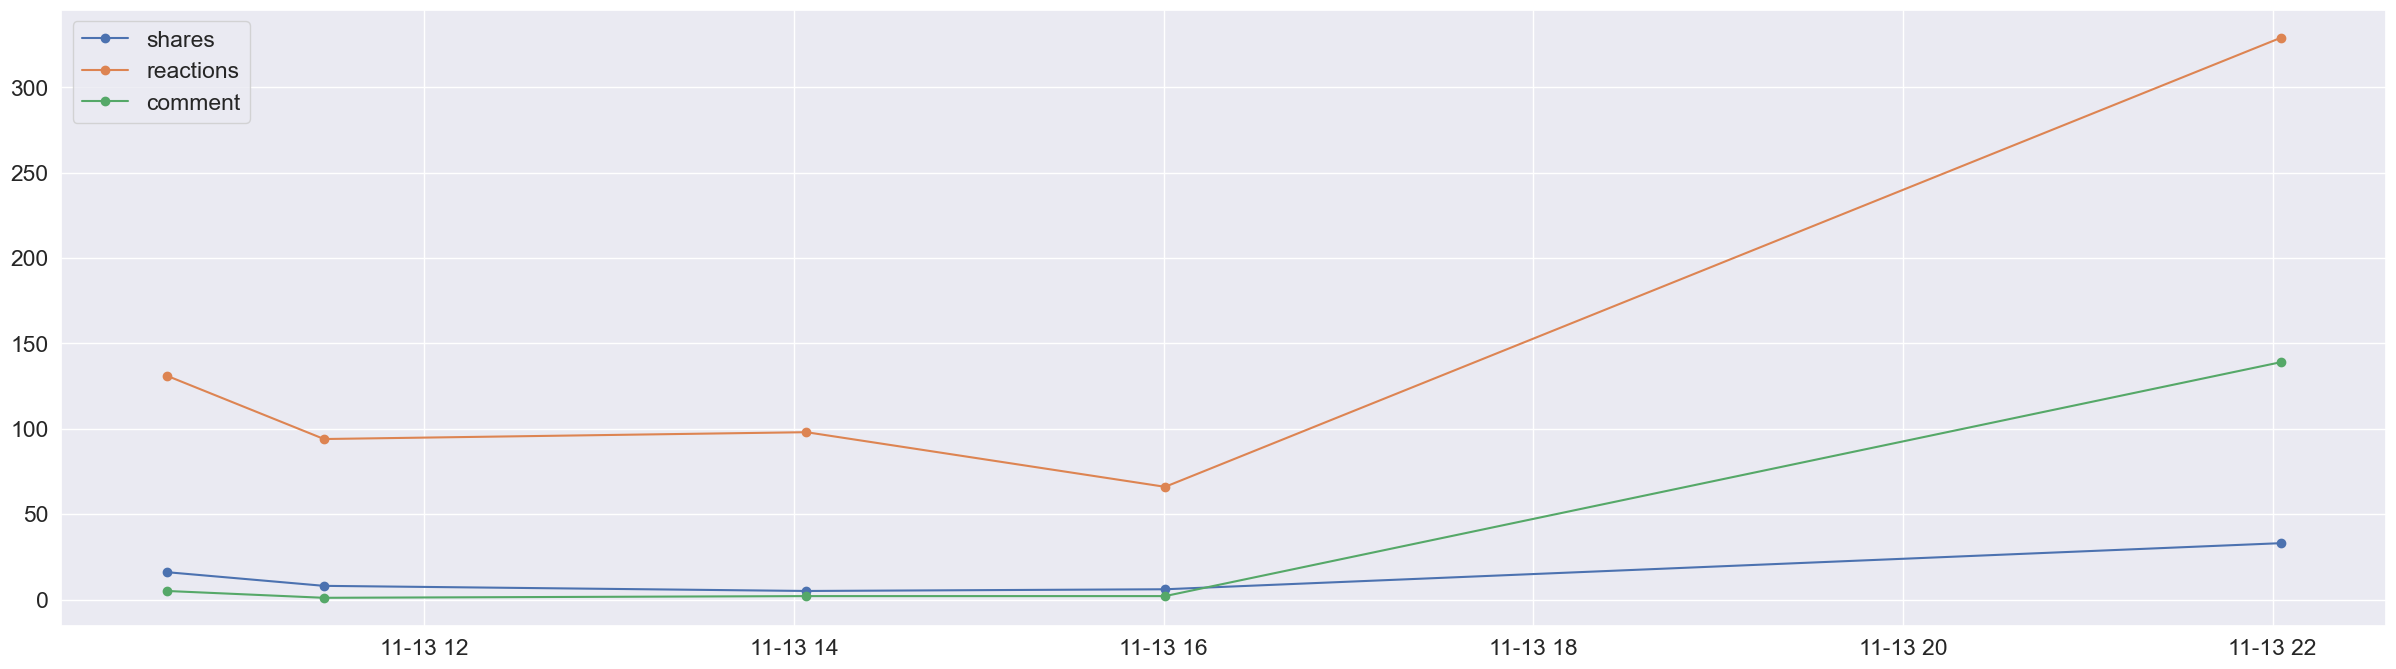

In [56]:
fig,ax= plt.subplots(figsize=(30,8))
ax.plot(post_df_full['time'].head(5),post_df_full['shares'].head(5),label='shares',marker='o')
ax.plot(post_df_full['time'].head(5),post_df_full['reaction_count'].head(5),label='reactions',marker='o')
ax.plot(post_df_full['time'].head(5),post_df_full['comments'].head(5),label='comment',marker='o')
plt.legend()
